# Chitkara, Shubham - Homework 1

## Question 1: Inverse Method for exponentials

1. Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random deviates from an exponential distribution with mean $\mu$. $\mu$ and the number of random deviates should be arguments to your function. This is Example 22.3.1 in Lange. Be aware that there are two standard methods for parameterizing the exponential.


In [409]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time

%matplotlib inline
rcParams['figure.figsize']=8,6
plt.style.use('seaborn-white')


n = 1000
mu=100
U = np.random.uniform(size=n)
X = -mu*np.log(1-U)
X

array([  2.59854838e+00,   7.47660552e+00,   3.96742105e+01,
         1.18896858e+01,   1.13828235e+01,   1.05736295e+02,
         2.53125577e+01,   5.23861302e+01,   3.90087805e+02,
         3.99514291e+01,   2.18993122e+02,   4.91565222e+01,
         9.11876824e+01,   2.28037832e+02,   4.54815610e+02,
         2.46027428e+01,   6.45726713e+01,   2.66277625e+02,
         8.81869161e+01,   2.13278505e+02,   1.10951596e+02,
         7.67525735e+01,   3.39590489e+01,   4.56760439e+01,
         5.40291721e+01,   1.49024106e+02,   1.48344609e+02,
         2.75294356e+01,   6.18212838e+01,   4.47503772e+01,
         1.01015616e+01,   1.77515150e+02,   1.13801271e+02,
         8.03756193e+01,   3.76297981e+01,   9.46911734e+00,
         1.29474829e+02,   5.46279998e+01,   1.72814232e+02,
         8.26434780e+00,   8.59778278e+01,   1.50618777e+01,
         1.08225825e+02,   5.58430660e+01,   1.33617841e+02,
         4.91790757e+00,   1.17762141e+02,   1.77769807e+02,
         1.61136289e+02,

2 . For some particular $\mu$ of your choosing, make a histogram of the random deviates and plot the appropriate exponential density curve on top of the histogram to confirm that the generator is working. Verify that the mean and standard deviation are what they should be.


Mean of X= 98.483146
Standard Deviation of X= 98.772116


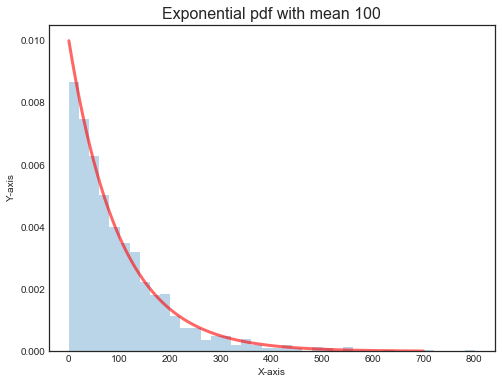

In [172]:
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
x = np.linspace(0,700, 1000)
plt.plot(x,expon.pdf(x,scale=100),'r-', lw=3, alpha=0.6)
plt.hist(X, **kwargs);
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Exponential pdf with mean %i' %mu , fontsize=16)

print('Mean of X= %f' %np.mean(X))
print('Standard Deviation of X= %f' %np.std(X))

3 . Compare the speed of your exponential generator to the language generator (rexp in R, numpy.random.exponential in python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.

In [412]:
t_1=time.clock()
n = 1000
mu=100
U = np.random.uniform(size=n)
X = -mu*np.log(1-U)
X_time= time.clock()-t_1
print('Time taken to generate random variable X %.6f' %X_time)

t_2=time.clock()
Y= np.random.exponential(100,1000)
Y_time= time.clock()-t_2
print('Time taken to generate random variable Y %.6f' %Y_time)

Time taken to generate random variable X 0.014567
Time taken to generate random variable Y 0.000131


## Question 2: Simulation Study of the LLN and CLT

1. Create a $n \times p$ matrix $X$ with $n=100$ and $p=1000$ and each entry $1$ with probability $0.5$ and $0$ with probability $0.5$. If you would like some intuition for this simulation consider this: Suppose 1/2 of all voters support proposition A. We conduct 100 surveys (number of rows of X) each with 1000 voters (number of columns = sample size of poll). A voter responds 1 if they support A, 0 if they do not support A. Note on Confusing Notation: The sample size of each poll is $p$. Usually $n$ is sample size.


#### **In this answer X matrix is used as B matrix and Y matrix is used as M matrix.

In [410]:
B = np.zeros((100,1000))
for i in range(0, 100):
    a= np.random.binomial(1, 0.5, 1000)
    B[i]= a
B

array([[ 0.,  0.,  1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  1., ...,  1.,  0.,  1.]])

2 . Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $j$ entry of $Y$ is
$$Y_{ij} = \frac{1}{j} \sum_{k=1}^j X_{ik}$$
Try to avoid using nested for loops.

In [369]:
M = np.zeros((100,1000))
for i in range (0,100):
    for j in range (0,1000):
        M[i,j]= (np.sum(B[i,0:j+1])) / (j+1)

3 . Plot each row of $Y$ (on the y--axis) against the column number (on the x--axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 10th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. What is this simulation showing?

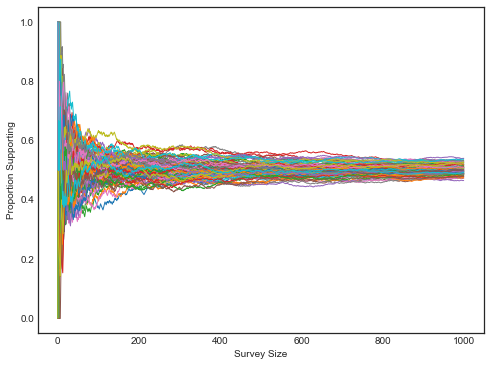

In [381]:
plt.xlabel('Survey Size')
plt.ylabel('Proportion Supporting')
for i in range (0,100):
    plt.plot(M[i],lw=1)

This plot looks pretty good, as we can see that in the moving average varias a lot at the start but tend to settle down and stays close to 0.5 towards the end, which we think should be the case.

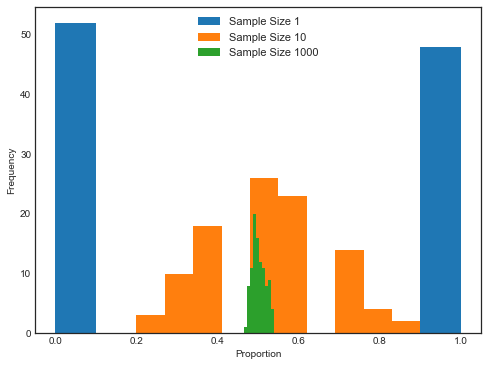

In [427]:
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.hist(M[:,0]);
plt.hist(M[:,9]);
plt.hist(M[:,-1]);
plt.legend(['Sample Size 1','Sample Size 10','Sample Size 1000'], fontsize=11, loc='best')
plt.show()

The first plot (represented by blue color) shows that the values are only 0 and 1, which looks great as the first column is the mean of the running mean of the first element generated in that row. So, it could be either 1/1 which is 1 or 0/1 which is zero.

The second plot (represented by yellow) which is the plot for the 9th column in Y matrix (in this case the M matrix), is pretty widespread which looks pretty good, as the values are just starting to move towards 0.5.

 The third plot(represented by green color) looks great as the average of the rows which we should to be close to 0.5 seems the same way.